In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import os
import seaborn as sns

In [2]:
# read in csv
read_file = os.path.join("Resources", "life_expectancy_data_region.csv")
life = pd.read_csv(read_file)
life

,Country,Year,Region,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Africa,Developing,44.3,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Africa,Developing,44.5,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Africa,Developing,44.8,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Africa,Developing,45.3,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
# get index of df to easily select columns to filter and help with renaming
life.columns

Index(['Country', 'Year', 'Region', 'Status', 'Life expectancy ',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
# trim dataset to focus on the impact Total Expenditure has on the Life Expectancy by country 
trim_df = life[['Region', 'Country', 'Year', 'Status', 'Life expectancy ',
              'Total expenditure']]
trim_df

,Region,Country,Year,Status,Life expectancy,Total expenditure
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


In [5]:
# rename columns
life_df = trim_df.rename(columns= {"Life expectancy ": "Life Expectancy",
                                "Total expenditure": "Total Expenditure (%)",
                                  })
life_df

,Region,Country,Year,Status,Life Expectancy,Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


In [6]:
# get count for each column in the trimmed df
life_df.count()

Region                   2938
Country                  2938
Year                     2938
Status                   2938
Life Expectancy          2928
Total Expenditure (%)    2712
dtype: int64

In [7]:
# remove rows with no Total Expenditure (%) informaiton
spending_df = life_df.dropna()
spending_df

,Region,Country,Year,Status,Life Expectancy,Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


In [8]:
# separate global data into developed vs developing nations
dev_df = spending_df.loc[spending_df["Status"] == "Developed"]
dev_df

,Region,Country,Year,Status,Life Expectancy,Total Expenditure (%)
113,Western Pacific,Australia,2014,Developed,82.7,9.42
114,Western Pacific,Australia,2013,Developed,82.5,9.36
115,Western Pacific,Australia,2012,Developed,82.3,9.36
116,Western Pacific,Australia,2011,Developed,82.0,9.20
117,Western Pacific,Australia,2010,Developed,81.9,9.20
...,...,...,...,...,...,...
2805,Americas,United States of America,2004,Developed,77.5,15.14
2806,Americas,United States of America,2003,Developed,77.2,15.60
2807,Americas,United States of America,2002,Developed,77.0,14.55
2808,Americas,United States of America,2001,Developed,76.9,13.73


In [9]:
undev_df = spending_df.loc[spending_df["Status"] == "Developing"]
undev_df

,Region,Country,Year,Status,Life Expectancy,Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


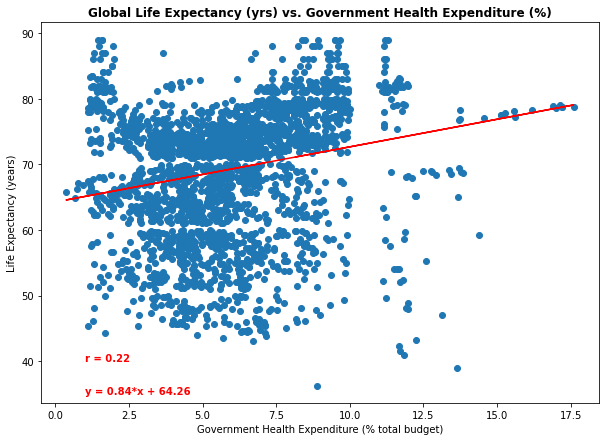

In [10]:
# plot global life expectancy vs health expenditure
plt.figure(figsize = (10,7))
plt.scatter(spending_df["Total Expenditure (%)"], spending_df["Life Expectancy"])
plt.title("Global Life Expectancy (yrs) vs. Government Health Expenditure (%)", fontweight="bold")
plt.xlabel("Government Health Expenditure (% total budget)")
plt.ylabel("Life Expectancy (years)")

# perform regression on global life expectancy vs health expenditure
(slope, intercept, rvalue, pvalue, stderr) = linregress(spending_df["Total Expenditure (%)"],spending_df["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (spending_df["Total Expenditure (%)"]* slope) + intercept
plt.plot(spending_df["Total Expenditure (%)"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq,(1,35),color="red", fontweight = "bold")
r_eq = f"r = {rvalue}"
plt.annotate(r_eq, (1, 40), color="red", fontweight = "bold")

plt.savefig("Catie_Images/GlobalExpenditure_matplot2.png")
plt.show()

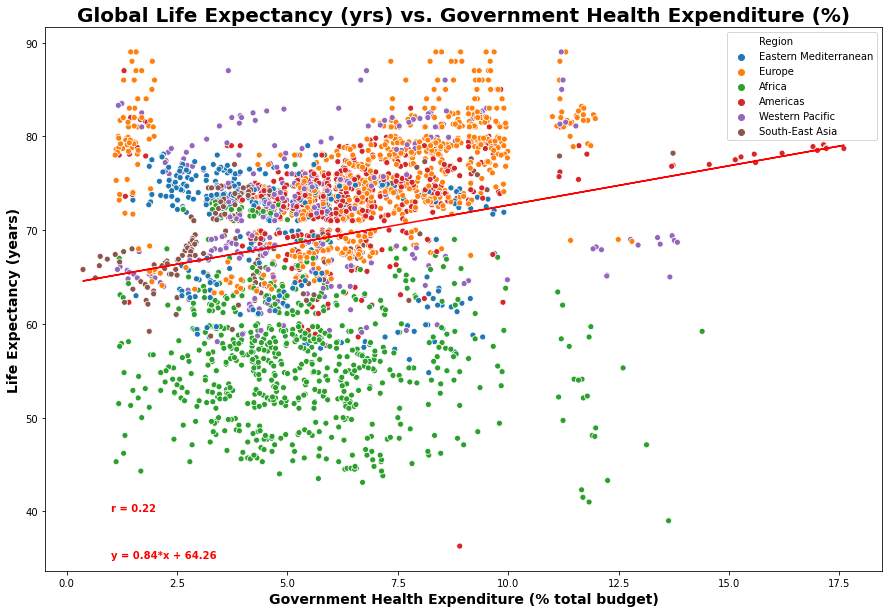

In [11]:
# plot global life expectancy vs health expenditure
plt.figure(figsize = (15,10))
sns.scatterplot(data=spending_df, x="Total Expenditure (%)", y="Life Expectancy", hue="Region")
plt.title("Global Life Expectancy (yrs) vs. Government Health Expenditure (%)", fontweight="bold", fontsize=20)
plt.xlabel("Government Health Expenditure (% total budget)", fontweight="bold", fontsize=14)
plt.ylabel("Life Expectancy (years)", fontweight="bold", fontsize=14)

# perform regression on global life expectancy vs health expenditure
(slope, intercept, rvalue, pvalue, stderr) = linregress(spending_df["Total Expenditure (%)"],spending_df["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (spending_df["Total Expenditure (%)"]* slope) + intercept
plt.plot(spending_df["Total Expenditure (%)"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq,(1,35),color="red", fontweight = "bold")
r_eq = f"r = {rvalue}"
plt.annotate(r_eq, (1, 40), color="red", fontweight = "bold")

plt.savefig("Catie_Images/GlobalExpenditure2.png")
plt.show()

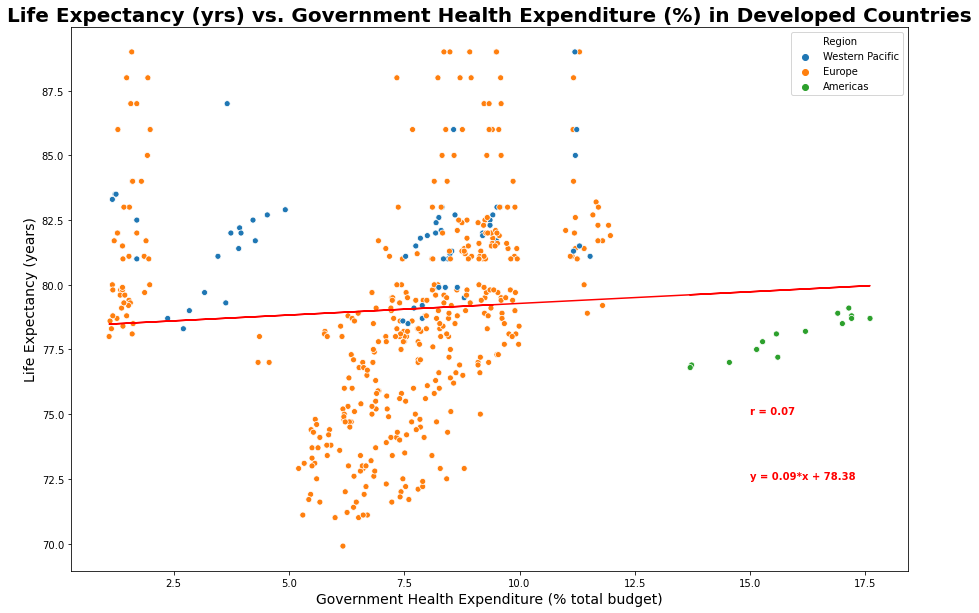

In [14]:
# plot life expectancy vs health expenditure in developed nations
plt.figure(figsize = (15,10))
sns.scatterplot(data=dev_df, x="Total Expenditure (%)", y="Life Expectancy", hue="Region")
plt.title("Life Expectancy (yrs) vs. Government Health Expenditure (%) in Developed Countries", fontweight="bold",fontsize=20)
plt.xlabel("Government Health Expenditure (% total budget)",fontsize=14)
plt.ylabel("Life Expectancy (years)",fontsize=14)

# perform regression on life expectancy vs health expenditure in developed nations
(slope, intercept, rvalue, pvalue, stderr) = linregress(dev_df["Total Expenditure (%)"],dev_df["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (dev_df["Total Expenditure (%)"]* slope) + intercept
plt.plot(dev_df["Total Expenditure (%)"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq,(15,72.5),color="red", fontweight = "bold")
r_eq = f"r = {rvalue}"
plt.annotate(r_eq, (15, 75), color="red", fontweight = "bold")

plt.savefig("Catie_Images/DevelopedNations2.png")
plt.show()

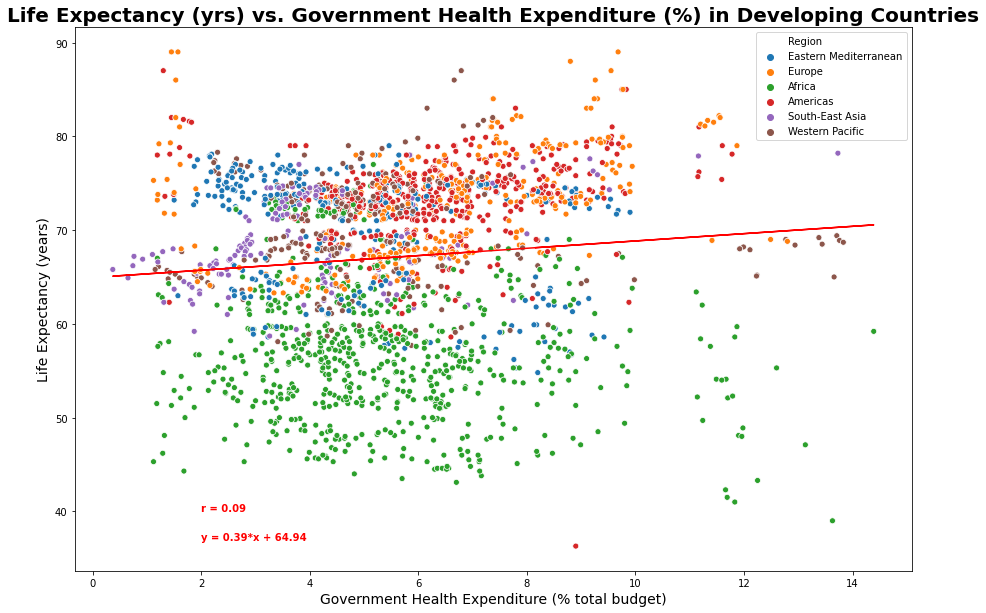

In [16]:
# plot life expectancy vs health expenditure in developing nations
plt.figure(figsize = (15,10))
sns.scatterplot(data=undev_df, x="Total Expenditure (%)", y="Life Expectancy", hue="Region")
plt.title("Life Expectancy (yrs) vs. Government Health Expenditure (%) in Developing Countries", fontweight="bold",fontsize=20)
plt.xlabel("Government Health Expenditure (% total budget)", fontsize=14)
plt.ylabel("Life Expectancy (years)",fontsize=14)

# perform regression on life expectancy vs health expenditure in developing nations
(slope, intercept, rvalue, pvalue, stderr) = linregress(undev_df["Total Expenditure (%)"],undev_df["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (undev_df["Total Expenditure (%)"]* slope) + intercept
plt.plot(undev_df["Total Expenditure (%)"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq,(2,37),color="red",  fontweight = "bold")
r_eq = f"r = {rvalue}"
plt.annotate(r_eq, (2,40), color="red", fontweight = "bold")

plt.savefig("Catie_Images/DevelopingNations2.png")
plt.show()

In [17]:
# look at one developing nation through the years
malawi_df = undev_df.loc[undev_df["Country"] == "Malawi"]
malawi_df

,Region,Country,Year,Status,Life Expectancy,Total Expenditure (%)
1571,Africa,Malawi,2014,Developing,57.6,11.38
1572,Africa,Malawi,2013,Developing,56.7,1.96
1573,Africa,Malawi,2012,Developing,55.3,12.60
1574,Africa,Malawi,2011,Developing,54.1,11.67
1575,Africa,Malawi,2010,Developing,52.9,1.50
1576,Africa,Malawi,2009,Developing,51.5,1.18
1577,Africa,Malawi,2008,Developing,50.0,1.70
1578,Africa,Malawi,2007,Developing,48.5,9.31
1579,Africa,Malawi,2006,Developing,47.1,8.99
1580,Africa,Malawi,2005,Developing,46.0,8.20


The correlation between Malawi govt spending & life expectancy is 0.11


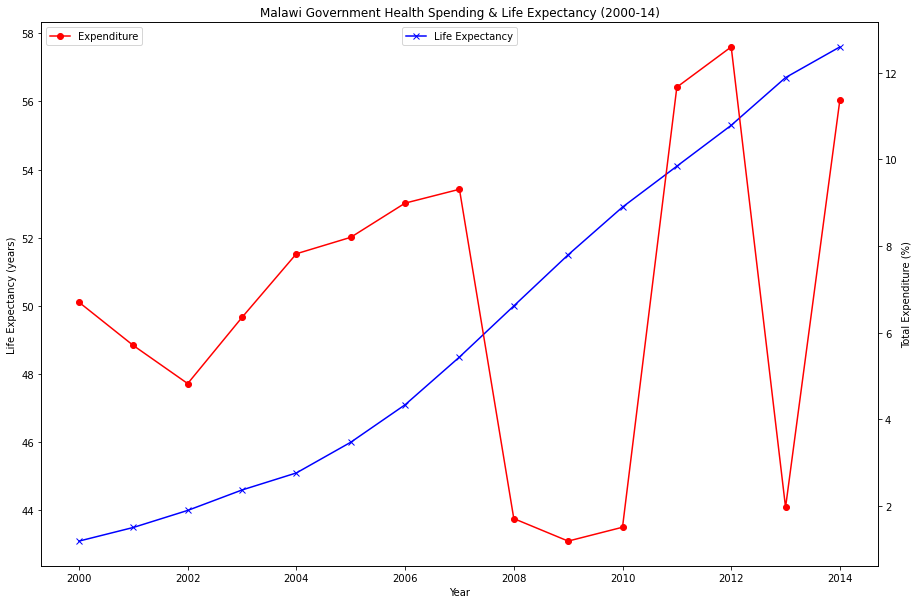

In [18]:
# plot gov expenditure and life expectancy over the years for Malawi (developing country)
fig, ax = plt.subplots(figsize =(15,10))

# twin object for dual y-axes on the same plot 
ax2 = ax.twinx()

# plot first y axis
line1 = ax.plot(malawi_df["Year"], malawi_df["Life Expectancy"], color = "blue", marker = "x", label = "Life Expectancy")

#set x axis label
ax.set_xlabel("Year")
# set first y axis label 
ax.set_ylabel("Life Expectancy (years)")

# plot second y axis
line2 = ax2.plot(malawi_df["Year"], malawi_df["Total Expenditure (%)"], color = "red", marker = "o", label="Expenditure")
# set second y axis label
ax2.set_ylabel("Total Expenditure (%)")

ax.set_title("Malawi Government Health Spending & Life Expectancy (2000-14)")

ax.legend(loc = "upper center")
ax2.legend(loc = "upper left")

# perform regression on life expectancy vs health expenditure 
(slope, intercept, rvalue, pvalue, stderr) = linregress(malawi_df["Total Expenditure (%)"],malawi_df["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (malawi_df["Total Expenditure (%)"]* slope) + intercept

print(f"The correlation between Malawi govt spending & life expectancy is {rvalue}")

#save fig and display fig
plt.savefig("Images/MalawiExpenditure2.png")
plt.show()


In [19]:
# look at one developing nation through the years
sweden_df = dev_df.loc[dev_df["Country"] == "Sweden"]
sweden_df

,Region,Country,Year,Status,Life Expectancy,Total Expenditure (%)
2506,Europe,Sweden,2014,Developed,82.3,11.93
2507,Europe,Sweden,2013,Developed,81.9,11.97
2508,Europe,Sweden,2012,Developed,81.7,11.80
2509,Europe,Sweden,2011,Developed,81.7,11.70
2510,Europe,Sweden,2010,Developed,81.5,9.47
2511,Europe,Sweden,2009,Developed,81.4,9.94
2512,Europe,Sweden,2008,Developed,81.1,9.23
2513,Europe,Sweden,2007,Developed,89.0,8.92
2514,Europe,Sweden,2006,Developed,88.0,8.95
2515,Europe,Sweden,2005,Developed,85.0,9.60


The correlation between Swedish govt spending & life expectancy is -0.12


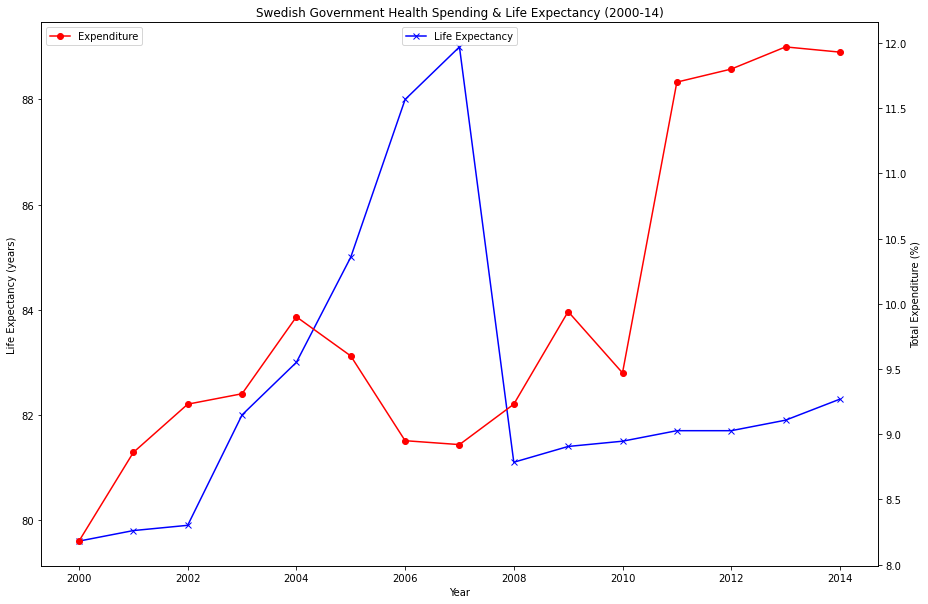

In [20]:
# plot gov expenditure and life expectancy over the years for Sweden (developed country)
fig, ax = plt.subplots(figsize =(15,10))

# twin object for dual y-axes on the same plot 
ax2 = ax.twinx()

# plot first y axis
line1 = ax.plot(sweden_df["Year"], sweden_df["Life Expectancy"], color = "blue", marker = "x", label = "Life Expectancy")

#set x axis label
ax.set_xlabel("Year")
# set first y axis label 
ax.set_ylabel("Life Expectancy (years)")

# plot second y axis
line2 = ax2.plot(sweden_df["Year"], sweden_df["Total Expenditure (%)"], color = "red", marker = "o", label="Expenditure")
# set second y axis label
ax2.set_ylabel("Total Expenditure (%)")

ax.set_title("Swedish Government Health Spending & Life Expectancy (2000-14)")

ax.legend(loc = "upper center")
ax2.legend(loc = "upper left")

# perform regression on life expectancy vs health expenditure 
(slope, intercept, rvalue, pvalue, stderr) = linregress(sweden_df["Total Expenditure (%)"],sweden_df["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (sweden_df["Total Expenditure (%)"]* slope) + intercept

print(f"The correlation between Swedish govt spending & life expectancy is {rvalue}")

#save fig and display fig
plt.savefig("Images/SwedenExpenditure2.png")
plt.show()


In [ ]:
# just for fun, compare with USA
USA_df = dev_df.loc[dev_df["Country"] == "United States of America"]
USA_df

In [ ]:
# plot gov expenditure and life expectancy over the years for Sweden (developed country)
fig, ax = plt.subplots(figsize =(15,10))

# twin object for dual y-axes on the same plot 
ax2 = ax.twinx()

# plot first y axis
line1 = ax.plot(USA_df["Year"], USA_df["Life Expectancy"], color = "blue", marker = "x", label = "Life Expectancy")

#set x axis label
ax.set_xlabel("Year")
# set first y axis label 
ax.set_ylabel("Life Expectancy (years)")

# plot second y axis
line2 = ax2.plot(USA_df["Year"], USA_df["Total Expenditure (%)"], color = "red", marker = "o", label="Expenditure")
# set second y axis label
ax2.set_ylabel("Total Expenditure (%)")

ax.set_title("United States Government Health Spending & Life Expectancy (2000-14)")

ax.legend(loc = "upper center")
ax2.legend(loc = "upper left")

# perform regression on life expectancy vs health expenditure 
(slope, intercept, rvalue, pvalue, stderr) = linregress(USA_df["Total Expenditure (%)"],USA_df["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (USA_df["Total Expenditure (%)"]* slope) + intercept

print(f"The correlation between USA govt spending & life expectancy is {rvalue}")



#save fig and display fig
plt.savefig("Images/USAExpenditure2.png")
plt.show()
